## ABILITÁ INFORMATICHE E TELEMATICHE A.A. 2022/2023
### Sara Sbernardori
### SECONDA PARTE 

Si estende la procedura eseguita nella prima parte dell'esercizio a tre multipoli pari (0,2 e 4, quelli dispari sono nulli)

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

### 1. LETTURA DEI TRE MULTIPOLI DA UN SET DI DAT

In [2]:
Nbins=200 #Lunghezza vettore di dati
Nmeasures=10000 #10000
test=1 
measures_1=[]
measures_2=[]
measures_3=[]

for i in np.arange(Nmeasures)+1:
    fname= f'data/MockMeasures_2PCF_Test{test}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{test}_{i}.fits'
    
    file=fits.open(fname)
    table=file[1].data.copy()
    measures_1.append(table['XI0'])
    measures_2.append(table['XI2'])
    measures_3.append(table['XI4'])
    if i==1:
        scale=table['SCALE']    
    del table
    file.close()
    
measures_1=np.asarray(measures_1)
measures_2=np.asarray(measures_2) 
measures_3=np.asarray(measures_3) 


I tre multipoli vengono memorizzati in tre array diversi e poi vengono concatenati

In [3]:
measures=np.concatenate((measures_1.transpose(),measures_2.transpose(),measures_3.transpose()))

In [4]:
measures.shape

(600, 10000)

### 2. CALCOLO DELLA MATRICE DI COVARIANZA NUMERICA CON NUMPY

In [5]:
covMatrix=np.cov(measures, bias=True)

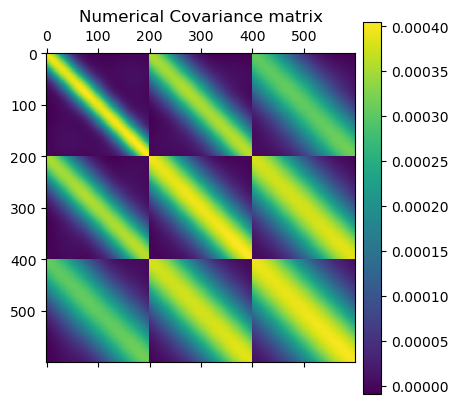

In [6]:
plt.matshow(covMatrix)


plt.title('Numerical Covariance matrix') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.savefig('3_1.png')
plt.show()

### 3. CALCOLO DELLA COVARIANZA TEORICA

In [7]:
if test==1:
    sig = [0.02, 0.02, 0.02]
    h = [25, 50, 75]
elif test==2:
    sig = [0.02, 0.01, 0.005]
    h = [50, 50, 50]
else:
    sig = [0.02, 0.01, 0.005]
    h = [5, 5, 5]

###### COVARIANZA TEORICA DEI TRE MULTIPOLI CON LE CROSS-CORRELAZIONI

In [8]:
 def cov_th(r1, r2, sig1, sig2, h1, h2):
    return sig1*sig2*(2.*h1*h2/(h1**2.+h2**2.))**0.5*np.exp(-(r1-r2)**2./(h1**2.+h2**2.))

In [9]:
C_th=np.zeros((600,600),dtype=float)

for l1 in range(0,3):
    for l2 in range(0,3):
        for i in range(Nbins):
            for j in range(Nbins):
                C_th[i+l1*Nbins][j+l2*Nbins]=cov_th(scale[i],scale[j],sig[l1],sig[l2],h[l1],h[l2])

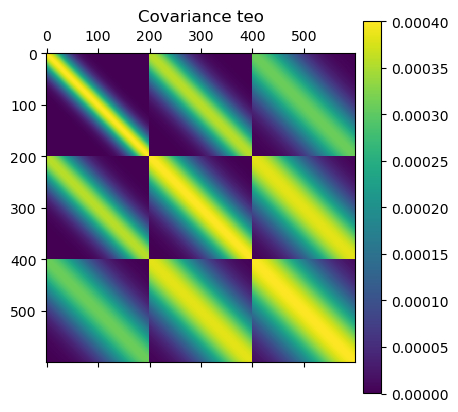

In [10]:
plt.matshow(C_th)

plt.title('Covariance teo') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.savefig('3_2.png')
plt.show()

##### MATRICE DEI RESIDUI NON NORMALIZZATA

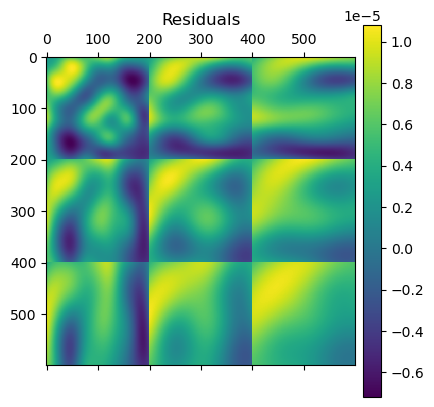

In [11]:
plt.matshow(C_th-covMatrix)

plt.title('Residuals') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.show()

### 4. MATRICE DI CORRELAZIONE

In [12]:
R=np.zeros((600,600),dtype=float) #Matrice di correlazione

for i in range(600):
    for j in range(600):
        R[i][j]=C_th[i][j]/(C_th[i][i]*C_th[j][j])**0.5

##### RESIDUI TRA COVARIANZA TEORICA E MISURA NORMALIZZATI ALLA LORO VARIANZA

In [13]:
Res=np.zeros((600,600),dtype=float) #Matrice dei residui

for i in range(600):
    for j in range(600):
        Res[i][j]=(C_th[i][j]-covMatrix[i][j])*((Nmeasures-1)/((1.+R[i][j])*C_th[i][i]*C_th[j][j]))**0.5 #gaussiana con media 0 e deviazione standard 1
Res_2=Res.reshape(600**2)

##### VALIDAZIONE

In [14]:
rms_deviation=np.std(Res_2)

print(f"rms deviation of normalized residuals: {rms_deviation}")

rms deviation of normalized residuals: 0.8344348930732991


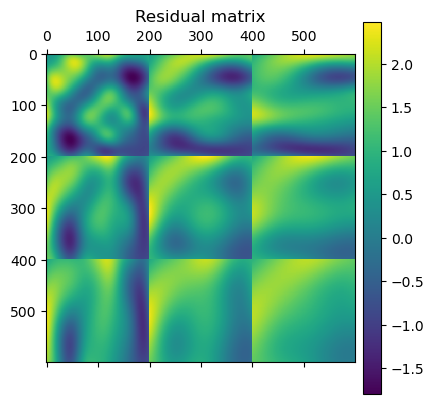

In [15]:
plt.matshow(Res)

plt.title('Residual matrix') 
plt.colorbar(orientation="vertical", pad=0.02)

plt.savefig('3_3.png')
plt.show()